In [43]:
import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.calc import parcel_profile, cape_cin
from metpy.units import units
import metpy.calc as mpcalc

# Define a standard atmospheric profile
pressure = np.array([1000, 950, 900, 850, 800, 750, 700, 650, 600, 550, 500,400,200,100]) * units.hPa
temperature = np.array([30, 27, 24, 17, 5, -2, -8, -15, -22, -30, -40,-55,-66,-70]) * units.degC
dewpoint = np.array([25, 22, 15, 8, 2, -4, -10, -17, -25, -34, -42,-56,-67,-70]) * units.degC

# Define surface temperature and dewpoint
surface_temp = temperature[0]
surface_dewpoint = dewpoint[0]



In [44]:
# Step 1: Plot initial Skew-T with profile
def plot_initial_profile():
    fig = plt.figure(figsize=(9, 9))
    skew = SkewT(fig)

    # Plot temperature and dewpoint
    skew.plot(pressure, temperature, 'r', label='Temperature')
    skew.plot(pressure, dewpoint, 'g', label='Dewpoint')

    # Add title and labels
    plt.title("Step 1: Initial Temperature and Dewpoint Profile")
    plt.legend(loc='upper right')
    plt.show()

# Step 2: Plot lifted parcel path
def plot_lifted_parcel():
    fig = plt.figure(figsize=(9, 9))
    skew = SkewT(fig)

    # Plot temperature and dewpoint
    skew.plot(pressure, temperature, 'r', label='Temperature')
    skew.plot(pressure, dewpoint, 'g', label='Dewpoint')

    # Calculate parcel profile and plot
    parcel_prof = parcel_profile(pressure, surface_temp, surface_dewpoint).to('degC')
    skew.plot(pressure, parcel_prof, 'k', linestyle='--', label='Parcel Path')

    # Add title and labels
    plt.title("Step 2: Lifted Parcel Path")
    plt.legend(loc='upper right')
    plt.show()

# Step 3: Highlight CAPE and CIN
def plot_cape_cin():
    fig = plt.figure(figsize=(9, 9))
    skew = SkewT(fig)

    # Plot temperature and dewpoint
    skew.plot(pressure, temperature, 'r', label='Temperature')
    skew.plot(pressure, dewpoint, 'g', label='Dewpoint')

    # Calculate parcel profile
    parcel_prof = parcel_profile(pressure, surface_temp, surface_dewpoint).to('degC')
    skew.plot(pressure, parcel_prof, 'k', linestyle='--', label='Parcel Path')

    # Calculate CAPE and CIN
    cape, cin = mpcalc.cape_cin(pressure, temperature, dewpoint, parcel_prof)

    # Add annotations for CAPE and CIN
    skew.ax.annotate(f'CAPE: {cape.magnitude:.2f} J/kg', xy=(0.75, 0.25), xycoords='axes fraction',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='none'))
    skew.ax.annotate(f'CIN: {cin.magnitude:.2f} J/kg', xy=(0.75, 0.20), xycoords='axes fraction',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='none'))

    # Add title and labels
    plt.title("Step 3: CAPE and CIN Calculation")
    plt.legend(loc='upper right')
    plt.show()

# Sequential plotting function
def plot_steps():
    plot_initial_profile()   # Step 1: Initial profile
    plot_lifted_parcel()     # Step 2: Parcel path
    plot_cape_cin()          # Step 3: CAPE and CIN

# Run the function to display each step



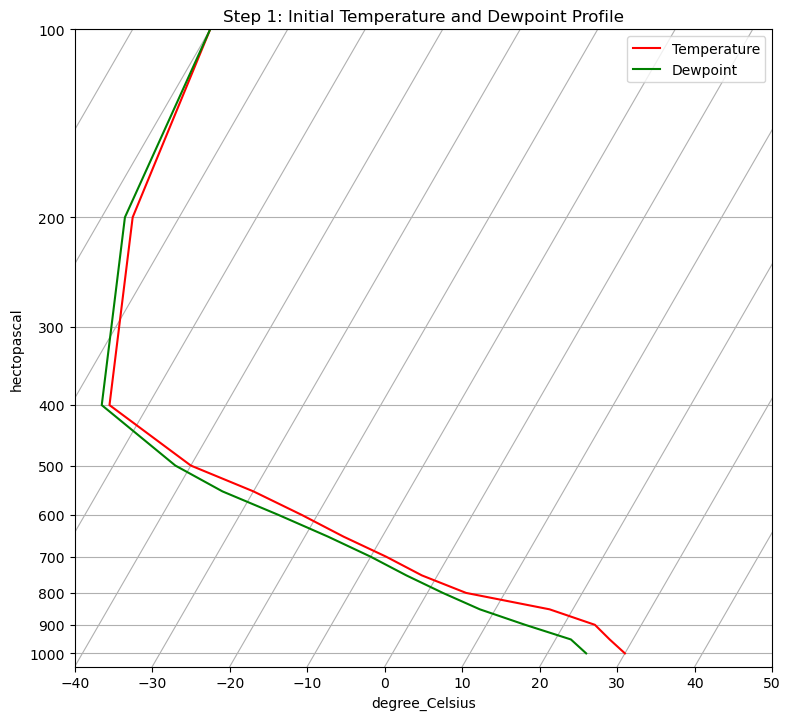

In [45]:
plot_initial_profile() 

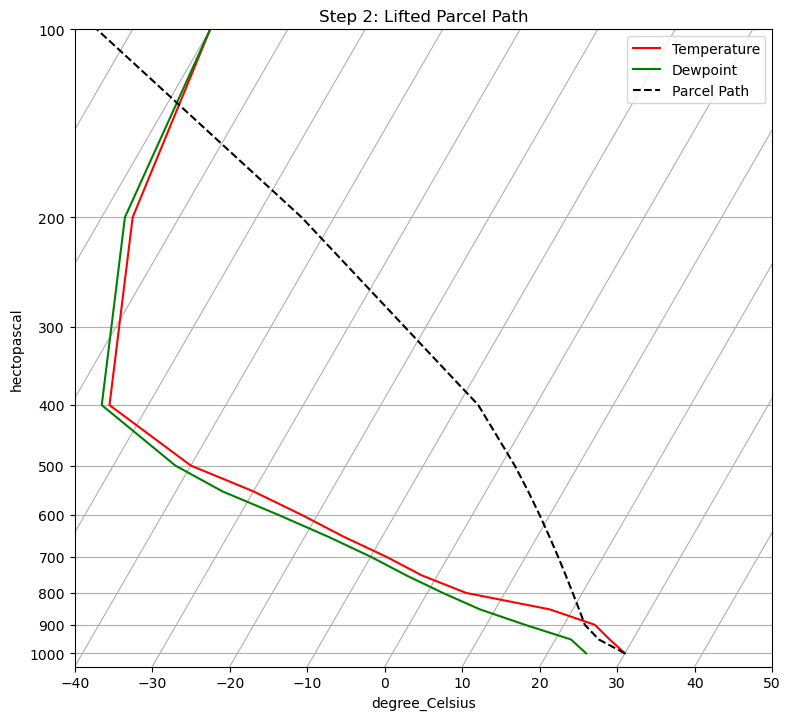

In [46]:
plot_lifted_parcel()

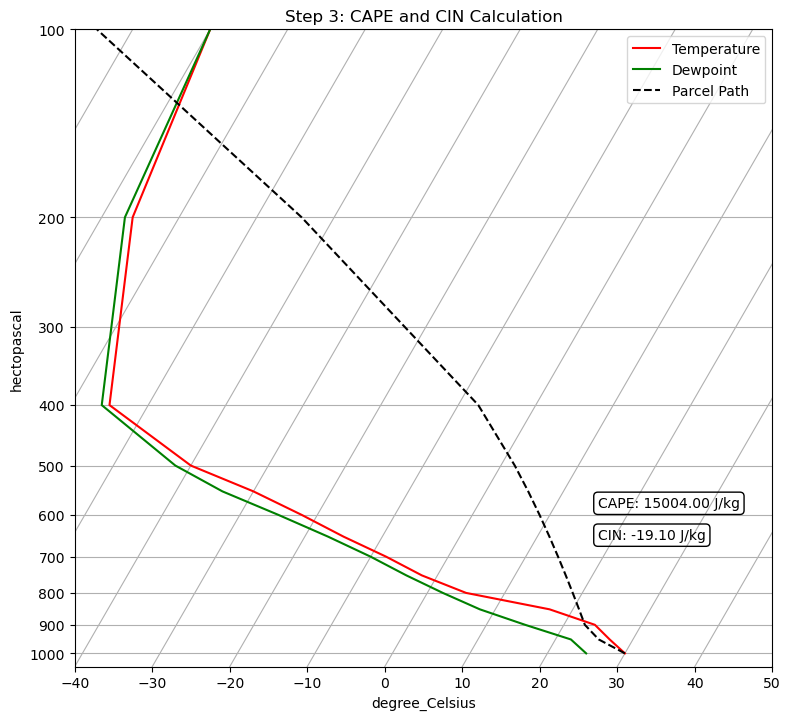

In [47]:
plot_cape_cin()